# Compute Retrieval for our Rydberg atom
We are using Rb87 and interested in states 

42D5/2

5P3/2


5S1/2



Rabi Frequencies and decay constants are computed in [Rydberg_Atom_details.ipynb](Rydberg_Atom_details.ipynb)

## Imports

In [1]:
import matplotlib
from matplotlib import animation
matplotlib.use('TKAgg')
from maxwellbloch import mb_solve

C:\Users\A_SAU\Anaconda3\envs\Rydberg\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


## Define atom and fields

In [22]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1]], 
        "rate": 1.0
      },
      { "channels": [[1,2]], 
        "rate": 0.0002042663806686294
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 0.1390044120935759,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "coupling",
        "rabi_freq": 0,
        "rabi_freq_t_args": 
        {
            "ampl": 1.0,
          "on": -200.0, 
          "off": 1000.0
          },
        "rabi_freq_t_func": "square"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 1,
  "interaction_strengths": [100, 100],
  "velocity_classes": null,
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/Rb87-EIT" 
}
"""

In [23]:
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

CPU times: total: 0 ns
Wall time: 2.86 ms


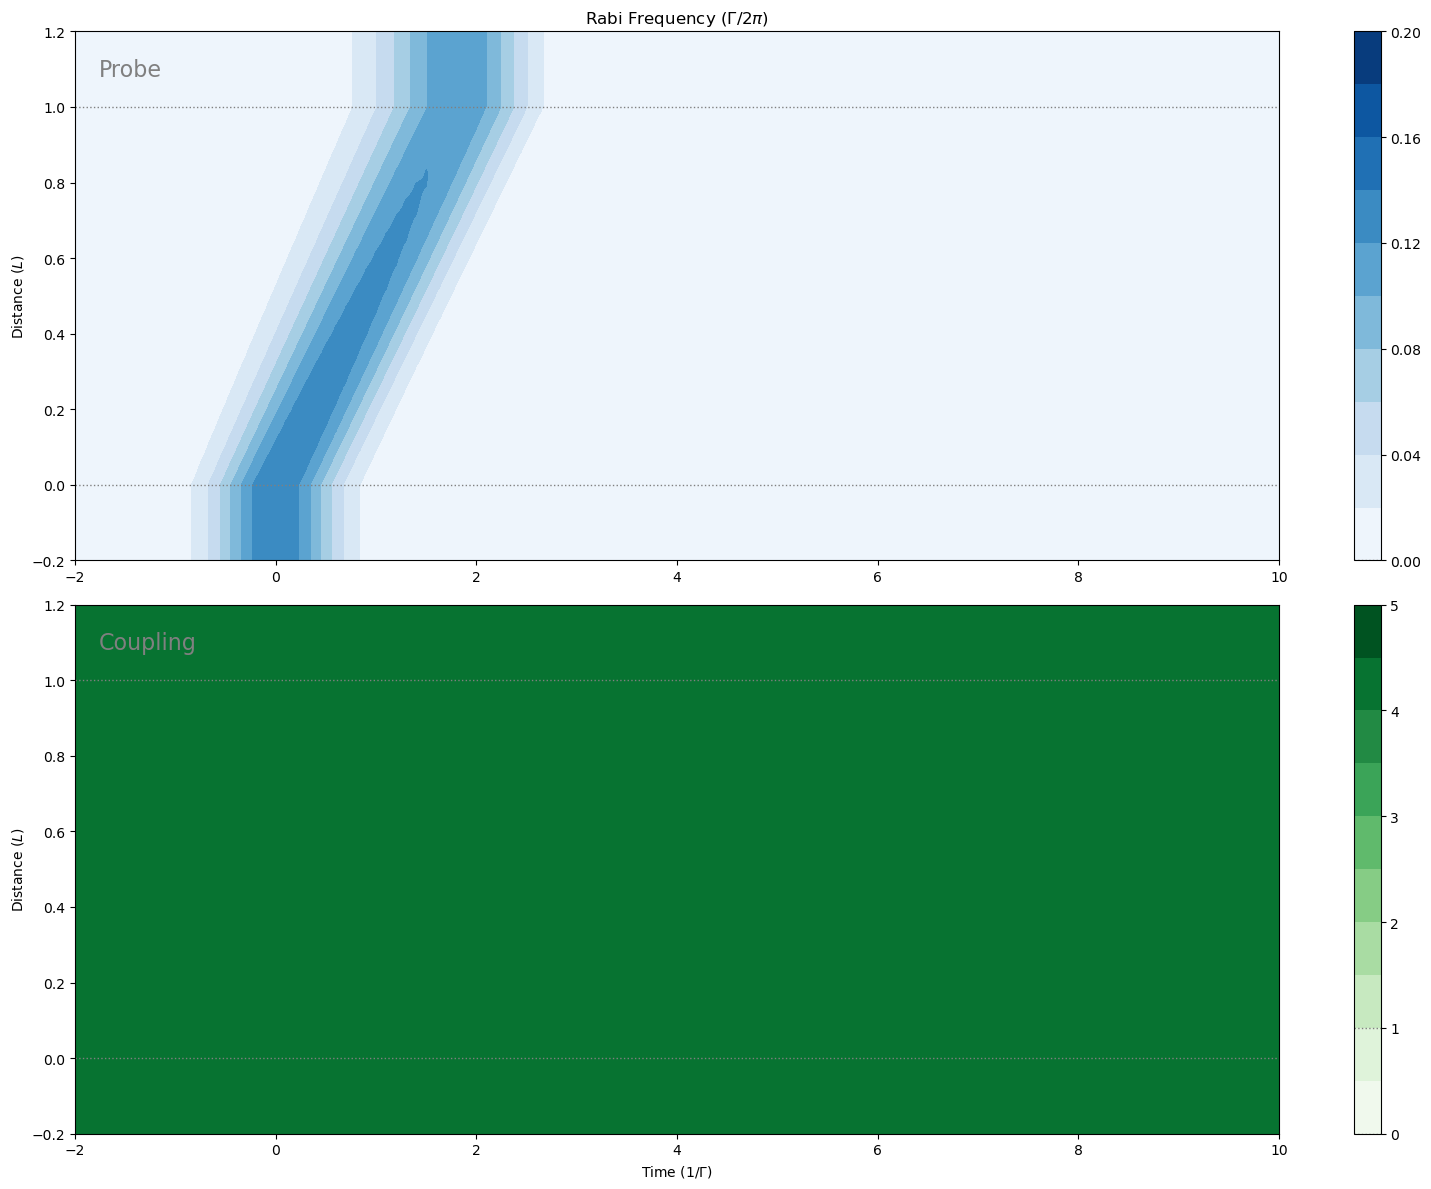

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0,  2e-1, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 5, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()
plt.savefig('images/Rb87-EIT-no_couple.png')

In [54]:
from maxwellbloch import fixed

speed_of_light = 0.3 # [cm /μs] THIS IS 10^5 SLOWER THAN C!

tlist_fixed_frame = fixed.t_list(mb_solve_00, speed_of_light)
field_fixed_frame = fixed.rabi_freq_abs(mb_solve_00, 0, speed_of_light)

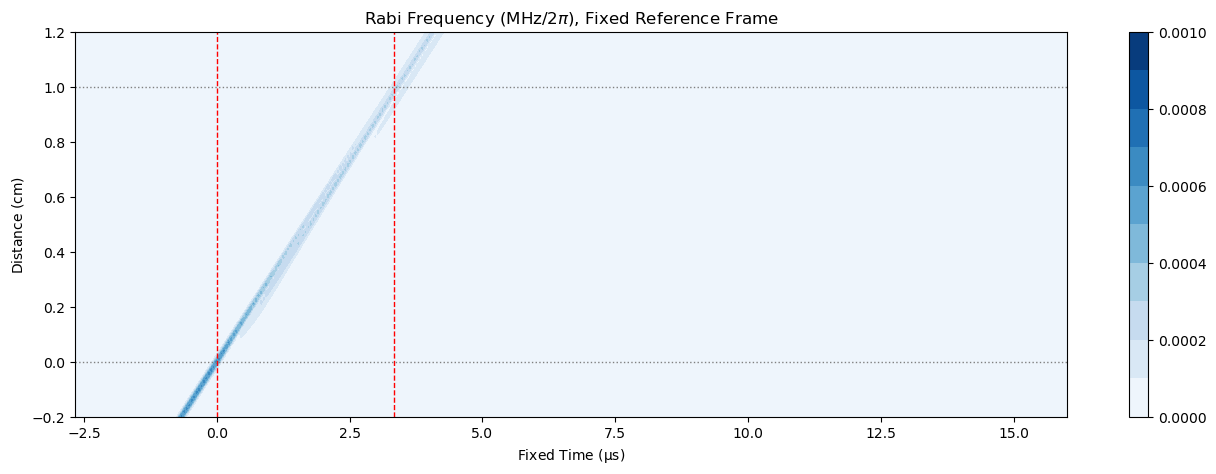

In [25]:
fig, ax = plt.subplots(figsize=(16, 5))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mb_solve_00.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\mathrm{MHz} / 2\pi $), Fixed Reference Frame')
ax.set_xlabel('Fixed Time ($\mathrm{\mu s}$)')
ax.set_ylabel('Distance ($\mathrm{cm}$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);